# 주식 데이터를 활용한 EDA project (1)

EDA는 **탐색적 데이터 분석**으로 분석에 들어가기에 앞서 데이터 분석가가 데이터를 다양한 각도에서 관찰하고 직관적으로 이해하기 위한 데이터 분석입니다. 이번 프로젝트는 주식 뉴스 기사 데이터에 대한 EDA를 pandas를 이용하여 수행하는 프로젝트입니다. EDA 와 Pandas는 데이터 분석가의 눈과 귀이라고 해도 과언이 아니기 때문에 본 프로젝트를 통해 Pandas의 기능을 이용하여 간단하게 데이터에서의 유의미한 패턴과 분포를 찾아내고 시각화하는것에 중점을 두었습니다.

EDA는 정해진 답을 찾아내는 것은 아닙니다. 데이터의 유의미한 패턴 및 내제되어 있는 의미를 찾아내는 과정 모두가 EDA 입니다.

## 1. Import Library

데이터 분석을 위한 기본적인 라이브러리를 import합니다. 그리고 분석을 하려는 데이터를 살펴보겠습니다. (데이터의 위치는 쥬피터 노트북과 같은 폴더내에, datasets이라는 폴더아래에 들어있습니다.)

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns  # Visualization을 위한 라이브러리입니다.
import matplotlib.pyplot as plt

import os
print(os.listdir("./datasets"))

['state-abbrevs.csv', 'state-areas.csv', 'state-population.csv', 'upload_DJIA_table.csv']


`upload_DJIA_table.csv` 데이터를 로딩하고, 데이터의 처음 5개 row를 간단하게 출력해봅니다. 

In [8]:
df = pd.read_csv('./datasets/upload_DJIA_table.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


##  2. Summarize Data

Pandas의 함수를 활용하여 데이터의 기본적인 정보를 살펴봅니다. 특히 sum, mean, max, min, quantile 등은 데이터를 요약하는 measurement 입니다. 큰 데이터를 하나의 요약된 수치로 변경하여 데이터의 이해를 높이는 정보입니다.
- 함수 1 : DataFrame의 Index, Columns, Data types, Memory usage 정보
- 함수 2 : 행과 열의 수
- 함수 3 : 열의 이름
- 함수 4 : 데이터의 수 (행의 수)
- 함수 5 : 각 컬럼별 데이터의 총 합
- 함수 6 : 각 컬럼별 데이터의 평균
- 함수 7 : 각 컬럼별 데이터의 표준편차
- 함수 8 : 각 컬럼별 데이터의 1,2,3 사분위수
- 함수 9 : 각 컬럼별 데이터의 maximum 값
- 함수 10 : 각 컬럼의 통계치

In [9]:
# 함수 1 : DataFrame의 Index, Columns, Data types, Memory usage 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [13]:
# 함수 2 : 행과 열의 수
df.shape

(1989, 7)

In [12]:
# 함수 3 : 열의 이름
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [16]:
# 함수 4 : 데이터의 수 (행의 수)
df.index

RangeIndex(start=0, stop=1989, step=1)

In [21]:
# 함수 5 : 각 컬럼별 데이터의 총 합
df.sum(axis = 0)

Date         2016-07-012016-06-302016-06-292016-06-282016-0...
Open                                               2.67702e+07
High                                               2.69337e+07
Low                                                2.65988e+07
Close                                               2.6778e+07
Volume                                            323831020000
Adj Close                                           2.6778e+07
dtype: object

마지막 3개 데이터에 대하여 `High` 컬럼의 합을 구해봅니다.

In [0]:
df.tail(3)

,Date,Open,High,Low,Close,Volume,Adj Close
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312


In [18]:
np.sum(df.iloc[-3:,2])

35409.419922

In [23]:
# 함수 6 : 평균
df.mean()

Open         1.345912e+04
High         1.354130e+04
Low          1.337293e+04
Close        1.346303e+04
Volume       1.628110e+08
Adj Close    1.346303e+04
dtype: float64

In [25]:
# 함수 7 : 표준편차
df.std()

Open         3.143282e+03
High         3.136272e+03
Low          3.150421e+03
Close        3.144007e+03
Volume       9.392343e+07
Adj Close    3.144007e+03
dtype: float64

In [42]:
# 함수 8 : 1,2,3 사분위수
df.quantile(0.25) 

Open         1.647770e+04
High         1.655007e+04
Low          1.639277e+04
Close        1.647841e+04
Volume       1.926000e+08
Adj Close    1.647841e+04
Name: 0.75, dtype: float64

In [43]:
df.quantile(0.50)

Open         1.302205e+04
High         1.308811e+04
Low          1.295313e+04
Close        1.302558e+04
Volume       1.351700e+08
Adj Close    1.302558e+04
Name: 0.5, dtype: float64

In [44]:
df.quantile(0.75)  

Open         1.647770e+04
High         1.655007e+04
Low          1.639277e+04
Close        1.647841e+04
Volume       1.926000e+08
Adj Close    1.647841e+04
Name: 0.75, dtype: float64

In [24]:
# 함수 9 : 최대값
df.max()

Date         2016-07-01
Open            18315.1
High            18351.4
Low             18272.6
Close           18312.4
Volume        674920000
Adj Close       18312.4
dtype: object

처음 5개의 데이터에 대하여 `Low` 컬럼의 maximum 값을 구해봅니다.

In [0]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [32]:
df.iloc[:5 ,3]

0    17916.910156
1    17711.800781
2    17456.019531
3    17190.509766
4    17063.080078
Name: Low, dtype: float64

In [33]:
np.max(df.iloc[:5 ,3])

17916.910156

In [35]:
# 함수 10 : 각 컬럼의 통계치
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


## 3. 상관관계

데이터의 상관관계를 분석하는 것은 중요한 분석과정입니다. 특성간의(feature) 상관관계를 분석하여 특성의 선형성을 발견할 수 있습니다. 또한 상관관계는 feature를 선택할 때 사용하는 중요한 지표중에 하나입니다. 상관관계를 테이블로 표현하는 방법과 시각화하여 표현하는 방법을 모두 살펴보겠습니다.

In [46]:
# (1) 상관관계를 DataFrame으로 표현하기
df.corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.000000,0.999592,0.999436,0.998991,-0.691621,0.998991
High,0.999592,1.000000,0.999373,0.999546,-0.686997,0.999546
Low,0.999436,0.999373,1.000000,0.999595,-0.699572,0.999595
Close,0.998991,0.999546,0.999595,1.000000,-0.694281,1.000000
Volume,-0.691621,-0.686997,-0.699572,-0.694281,1.000000,-0.694281
Adj Close,0.998991,0.999546,0.999595,1.000000,-0.694281,1.000000


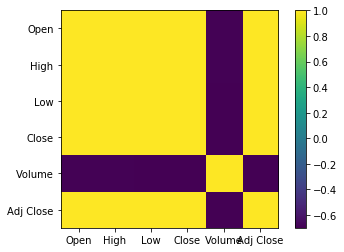

In [47]:
# (2). 상관관계를 DataFrame으로 표현하기
plt.imshow(df.corr(), cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(6), df.corr().columns.values)
plt.yticks(np.arange(6), df.corr().columns.values)
plt.show()

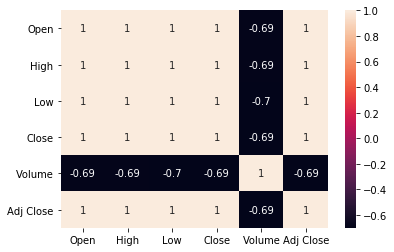

In [48]:
# seaborn을 활용하여 상관계수를 시각화해보기
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.show()

# 데이터 분석 Project (2)

## 문제 : 주어진 데이터를 활용하여 2010년 인구 밀도 기준으로 미국 주와 지역 순위를 계산하세요. (인구 밀도의 내림차순)

필요한 데이터를 로딩합니다.

In [49]:
population = pd.read_csv('./datasets/state-population.csv')
areas = pd.read_csv('./datasets/state-areas.csv')
abbrevs = pd.read_csv('./datasets/state-abbrevs.csv')

간단하게 데이터를 확인하고 데이터의 shape을 확인합니다.

In [50]:
# 인구에 대한 데이터
population.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [51]:
# 넓이에 대한 데이터
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [0]:
# 지역 약자에 대한 데이터
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [53]:
# 데이터의 shape
print(population.shape)
print(areas.shape)
print(abbrevs.shape)

(2544, 4)
(52, 2)
(51, 2)


Population 데이터에 State full name 데이터를 outer 조인 시킵니다. 왼쪽 dataframe의 키는 `state/region`이고 오른쪽 dataframe의 키는 `abbreviation`입니다.

In [55]:
merged = pd.merge(population, abbrevs, how='outer', \
                  left_on='state/region', right_on='abbreviation')

In [57]:
merged.head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


Null 값을 체크합니다.

In [58]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
abbreviation     True
dtype: bool

State full name(컬럼명 : `state`)의 Null값을 확인합니다.

In [60]:
merged[merged['state'].isnull()].head()

,state/region,ages,year,population,state,abbreviation
2448,PR,under18,1990,NaN,NaN,NaN
2449,PR,total,1990,NaN,NaN,NaN
2450,PR,total,1991,NaN,NaN,NaN
2451,PR,under18,1991,NaN,NaN,NaN
2452,PR,total,1993,NaN,NaN,NaN


PR 지역의 state 항목(full name)이 누락되어 있음을 볼 수 있습니다.

**Area 정보는 state의 full name을 사용하기 때문에, 누락된 값을 처리해야합니다.**

State full name 항목(컬럼명 : `state`)이 누락된 곳의 state/region을 살펴보겠습니다.

In [61]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

우리의 지식(사전 정보를 이용하면) 누락된 데이터를 쉽게 채워넣을 수 있습니다.

In [62]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'

다시 한 번 null 값을 확인합니다.

In [63]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
abbreviation     True
dtype: bool

State full name에 null값이 없음을 확인했습니다. 따라서 다른 값에 null이 있어도 우선 넘어갑니다.

다음으로, area 정보가 있는 dataframe을 merge 합니다.

In [64]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,AL,52423.0
1,AL,total,2012,4817528.0,Alabama,AL,52423.0
2,AL,under18,2010,1130966.0,Alabama,AL,52423.0
3,AL,total,2010,4785570.0,Alabama,AL,52423.0
4,AL,under18,2011,1125763.0,Alabama,AL,52423.0


Null 값을 다시 확인해봅니다.

In [65]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
abbreviation      True
area (sq. mi)     True
dtype: bool

Area에 null 값이 존재합니다. 면적을 계산할 때 area 컬럼이 필요하기 때문에 null값이 존재하면 안됩니다.

어떤 값이 null값을 가지는지 확인해봅니다.

In [66]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

United States의 null 값을 다루는 방법은 2가지중 1개로 사용할 수 있습니다.
 - Area의 전체 합(미국 전체의 면적이므로)로 값을 채운다.
 - 지역별 인구밀도를 구하는 문제이므로(전체 면적에 대한 정보가 필요없으므로) 그 데이터를 삭제한다.
 
사실, 주어진 문제를 해결하기 위해서는 2번째 방법을 선택하면 됩니다.

In [73]:
final.dropna(inplace=True)

Null 값을 다시 한 번 확인합니다.

In [74]:
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
abbreviation     False
area (sq. mi)    False
dtype: bool

더 이상 null 값이 존재하지 않습니다. 2010 인구밀도를 계산하기 위해, year와 ages를 살펴보겠습니다.

In [127]:
final['year'].unique()

array([2012, 2010, 2011, 2009, 2013, 2007, 2008, 2005, 2006, 2004, 2003,
       2001, 2002, 1999, 2000, 1998, 1997, 1996, 1995, 1994, 1993, 1992,
       1991, 1990], dtype=int64)

In [135]:
final.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,AL,52423.0
1,AL,total,2012,4817528.0,Alabama,AL,52423.0
2,AL,under18,2010,1130966.0,Alabama,AL,52423.0
3,AL,total,2010,4785570.0,Alabama,AL,52423.0
4,AL,under18,2011,1125763.0,Alabama,AL,52423.0


In [133]:
final['ages'].unique()

array(['under18', 'total'], dtype=object)

`2010`과 `전체 나이대(total)`에 대한 데이터를 가지고 옵니다.

In [189]:
data_2010 = final.query("(year == 2010) & ages in ['total']")

data_2010.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,AL,52423.0
91,AK,total,2010,713868.0,Alaska,AK,656425.0
101,AZ,total,2010,6408790.0,Arizona,AZ,114006.0
189,AR,total,2010,2922280.0,Arkansas,AR,53182.0
197,CA,total,2010,37333601.0,California,CA,163707.0


Index를 지정하여 최종결과값이 `Series`가 되어, key가 도시이름이 되도록 합니다.

In [190]:
data_2010.set_index('state', inplace=True)
data_2010.head()

,state/region,ages,year,population,abbreviation,area (sq. mi)
state,,,,,,
Alabama,AL,total,2010,4785570.0,AL,52423.0
Alaska,AK,total,2010,713868.0,AK,656425.0
Arizona,AZ,total,2010,6408790.0,AZ,114006.0
Arkansas,AR,total,2010,2922280.0,AR,53182.0
California,CA,total,2010,37333601.0,CA,163707.0


인구 밀도를 계산합니다. 

In [191]:
density = data_2010.population / data_2010['area (sq. mi)']
density.head()

state
Alabama        91.287603
Alaska          1.087509
Arizona        56.214497
Arkansas       54.948667
California    228.051342
dtype: float64

인구 밀도 순서대로 정렬하도록 합니다.

In [196]:
density.sort_values(ascending=False, inplace=True)
density  # 인구밀도가 높은 지역

state
District of Columbia    8898.897059
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
Massachusetts            621.815538
Maryland                 466.445797
Delaware                 460.445752
New York                 356.094135
Florida                  286.597129
Pennsylvania             275.966651
Ohio                     257.549634
California               228.051342
Illinois                 221.687472
Virginia                 187.622273
Indiana                  178.197831
North Carolina           177.617157
Georgia                  163.409902
Tennessee                150.825298
South Carolina           144.854594
New Hampshire            140.799273
Hawaii                   124.746707
Kentucky                 107.586994
Michigan                 102.015794
Washington                94.557817
Texas                     93.987655
Alabama                   91.287603
Louisiana                 87.676099
Wisconsin             

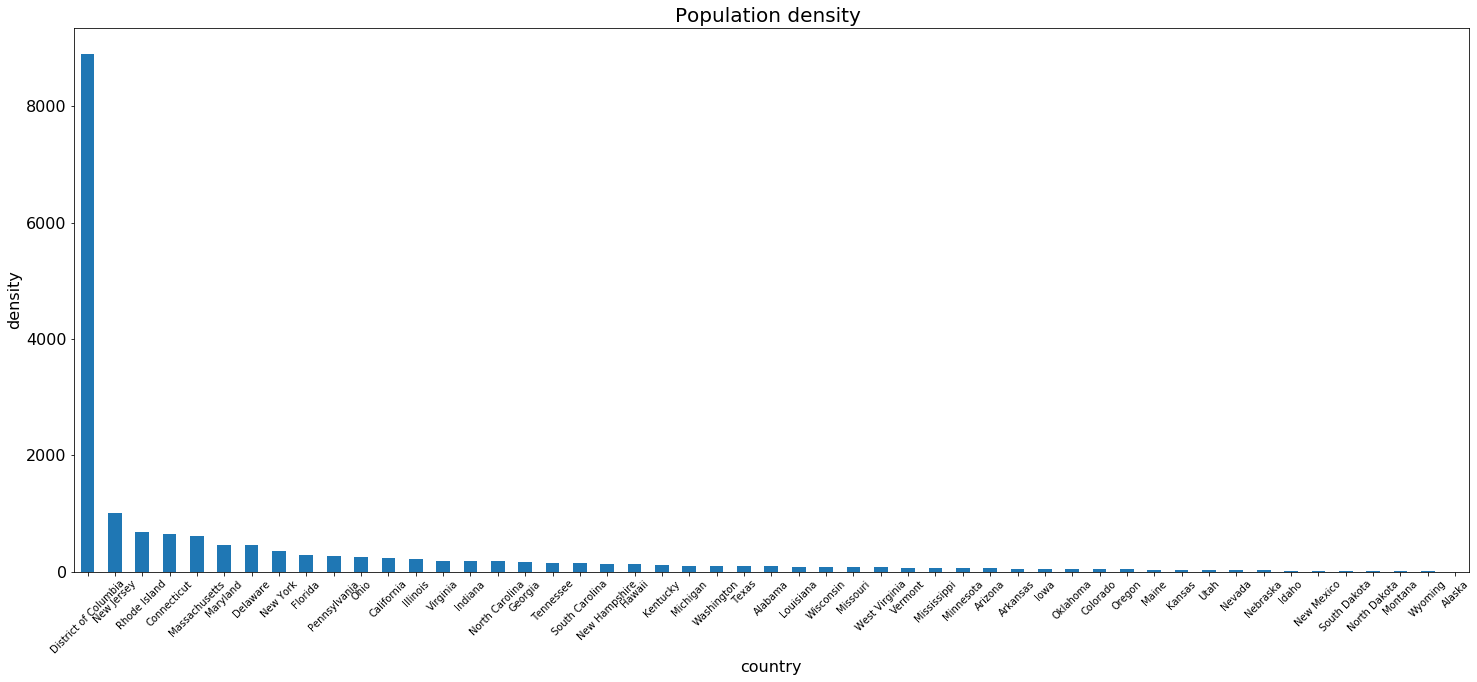

In [219]:
density.plot.bar(figsize = [25,10])
plt.title('Population density ',fontsize=20)
plt.xticks(fontsize=10,rotation=45)
plt.yticks(fontsize=16)
plt.xlabel('country',fontsize=16)
plt.ylabel('density',fontsize=16)
plt.show()